In [3]:
import numpy as np
import pandas as pd
import pickle
#from build_database import flux_obj
from scipy import interpolate
import matplotlib.pyplot as plt
import os
import itertools
import random
import os
%matplotlib inline
# Autoload changes made in external editor:
%load_ext autoreload
%autoreload 2

# --------------- Latex Plot Beautification --------------------------
fig_width_pt = 650.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 14,
          'text.fontsize': 14,
          'legend.fontsize': 10,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)

# --------------- Latex Plot Beautification --------------------------

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from matplotlib import collections  as mc
from load_rayfile import load_rayfile
import re

ray_dir = '/Users/austin/FUSE/WIPP/WIPPv4/rays/130f_60s_v2/'

# Get files, frequencies:
d = os.listdir(ray_dir)

# -- Check which frequencies we have --
freqs_ray  = []
freqs_damp = []

p = re.compile("\d+")
for s in d:
    if s.endswith(".dat"):
        if s.startswith('newray'):
            tmp = p.findall(s)
            freqs_ray.append(int(tmp[0]))

        elif s.startswith('d'):
            tmp = p.findall(s)
            freqs_damp.append(int(tmp[0]))

freqs_ray.sort()
freqs_damp.sort()

# -- confirm we have the same damping and ray files: --
assert freqs_ray == freqs_damp, "mismatch between rayfiles and damping files!"


In [5]:
# -- Load the ray files -- 
# ray_dir = '/Users/austin/FUSE/shared/users/asousa/WIPP/WIPPv4/rays/RT4/'

lats = np.arange(0,80, step=0.5)
freqs_log = np.linspace(np.log10(200), np.log10(60000), 130)
freqs = np.round(pow(10, freqs_log))

nsteps = np.zeros([len(freqs),len(lats)])
tg_end = np.zeros([len(freqs),len(lats)])

for freq_ind, frequency in enumerate(freqs_ray):
    RF = load_rayfile(ray_dir, frequency)
    for lat_ind, lat in enumerate(lats):
        if RF.has_key(lat):
            nsteps[freq_ind, lat_ind] = np.shape(RF[lat])[0]
            if nsteps[freq_ind, lat_ind] > 0:
                tg_end[freq_ind, lat_ind] = RF[lat]['tg'].tail(1).values[0]


loading  /Users/austin/FUSE/WIPP/WIPPv4/rays/130f_60s_v2/newray200.dat
loading  /Users/austin/FUSE/WIPP/WIPPv4/rays/130f_60s_v2/newray209.dat
loading  /Users/austin/FUSE/WIPP/WIPPv4/rays/130f_60s_v2/newray218.dat
loading  /Users/austin/FUSE/WIPP/WIPPv4/rays/130f_60s_v2/newray228.dat
loading  /Users/austin/FUSE/WIPP/WIPPv4/rays/130f_60s_v2/newray239.dat
loading  /Users/austin/FUSE/WIPP/WIPPv4/rays/130f_60s_v2/newray249.dat
loading  /Users/austin/FUSE/WIPP/WIPPv4/rays/130f_60s_v2/newray261.dat
loading  /Users/austin/FUSE/WIPP/WIPPv4/rays/130f_60s_v2/newray273.dat
loading  /Users/austin/FUSE/WIPP/WIPPv4/rays/130f_60s_v2/newray285.dat
loading  /Users/austin/FUSE/WIPP/WIPPv4/rays/130f_60s_v2/newray298.dat
loading  /Users/austin/FUSE/WIPP/WIPPv4/rays/130f_60s_v2/newray311.dat
loading  /Users/austin/FUSE/WIPP/WIPPv4/rays/130f_60s_v2/newray325.dat
loading  /Users/austin/FUSE/WIPP/WIPPv4/rays/130f_60s_v2/newray340.dat
loading  /Users/austin/FUSE/WIPP/WIPPv4/rays/130f_60s_v2/newray355.dat
loadin

In [6]:
# -- Plot ray files --
def plot_rays(RF, l_min=0, l_max=90):
    
    all_lats = np.array(sorted(RF.keys()))
    lats = all_lats[(all_lats >= l_min) & (all_lats <= l_max)]
#     print all_lats

    
    L_shells = [1.5, 2, 3, 4, 5]


    # Initialize plot
    fig, ax = plt.subplots()

    # Plot the earth
    earth = plt.Circle((0,0),1,color='0.5',alpha=1, zorder=100)

    # Plot the fieldlines
    for L in L_shells:
        lam = np.linspace(-80,80,181)
        L_r = L*pow(np.cos(lam*np.pi/180),2)
        Lx  = L_r*np.cos(lam*np.pi/180)
        Ly  = L_r*np.sin(lam*np.pi/180)
        plt.plot(Lx,Ly,color='r',linewidth=1,linestyle='dashed')  # Field line

    # Plot the rays
    for l in lats:    
        X = RF[l].distre*np.cos(RF[l].lat*np.pi/180.0)
        Y = RF[l].distre*np.sin(RF[l].lat*np.pi/180.0)
        # pick colormap here
        C = plt.cm.viridis(RF[l].power)
        points = np.array([X, Y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)

        lc = mc.LineCollection(segments, colors=C,alpha=1,linewidth=3)
    #     lc.set_linewidth(10)

        ax.add_collection(lc)


    ax.add_patch(earth)                    # The earth (round)

    ax.autoscale()
#     ax.set_xlim([0, 5])
#     ax.set_ylim([-2, 2])
    ax.set_xlabel('L')
    ax.set_ylabel('L')



    plt.show()






loading  /Users/austin/FUSE/WIPP/WIPPv4/rays/130f_60s_v2/newray1825.dat


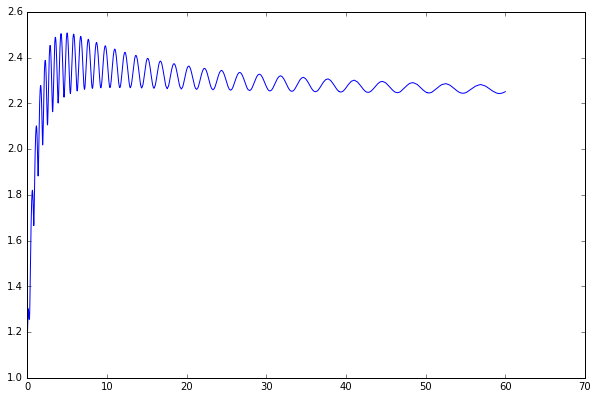

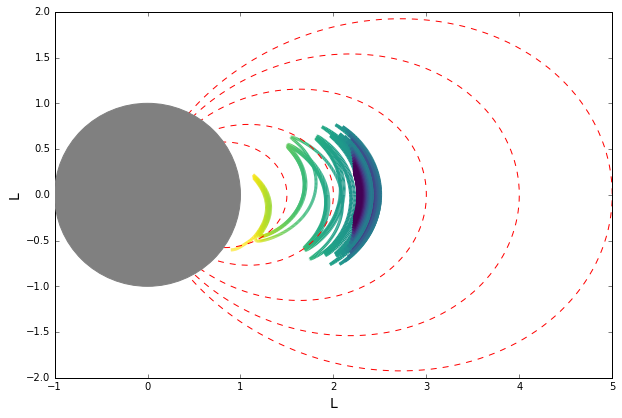

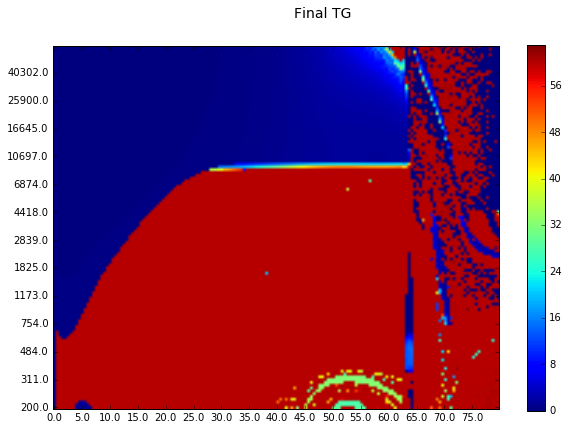

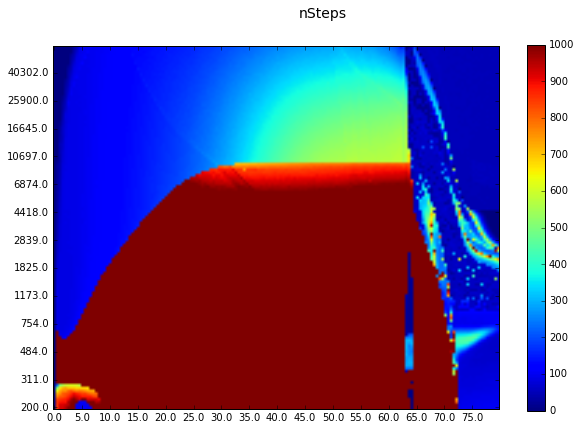

In [32]:
# Plot the lowest-latitude rays

frequency = 1825
RF = load_rayfile(ray_dir, frequency)

plt.figure()
plt.plot(RF[9.5]['tg'],RF[9.5]['distre'])


plot_rays(RF,l_min=9, l_max=11)


fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
img = ax1.imshow(tg_end, origin='lower')

xtix = np.arange(0, len(lats), step=10)
ax1.set_xticks(xtix)
ax1.set_xticklabels(lats[xtix])

ytix = np.arange(0, len(freqs),step=10)
ax1.set_yticks(ytix)
ax1.set_yticklabels(freqs[ytix])

plt.colorbar(img)

fig.suptitle("Final TG")


fig2 = plt.figure()
ax2 = fig2.add_subplot(1,1,1)
img2 = ax2.imshow(nsteps, origin='lower')

xtix = np.arange(0, len(lats), step=10)
ax2.set_xticks(xtix)
ax2.set_xticklabels(lats[xtix])

ytix = np.arange(0, len(freqs),step=10)
ax2.set_yticks(ytix)
ax2.set_yticklabels(freqs[ytix])

fig2.suptitle("nSteps")
plt.colorbar(img2)
img2.set_clim([0, 1000])



In [180]:
tmpA = ['a','b','c']
tmpB = ['x','y','z']
tmpC = ['1','2','3']

# print zip(tmpA, tmpB, tmpC)

tmplist = [x for x in itertools.product(tmpA, tmpB, tmpC)]


(27, 3)


In [18]:
L_targ_list = [1.33, 1.37, 1.41, 1.45, 1.49, 1.54, 1.59, 1.64, 1.70, 1.77, 1.84, 1.92, 2.00, 2.09, 2.19, 2.30, 2.42, 2.55, 2.70, 2.86, 3.04, 3.24, 3.46, 3.72, 4.00, 4.32, 4.69, 5.11, 5.60, 6.17, 6.83, 7.61, 8.55]

print len(L_targ_list)
130*33*12

print freqs

33
[   200.    209.    218.    228.    239.    249.    261.    273.    285.
    298.    311.    325.    340.    355.    371.    388.    406.    424.
    443.    463.    484.    506.    529.    553.    578.    604.    631.
    660.    690.    721.    754.    788.    823.    860.    899.    940.
    982.   1027.   1073.   1122.   1173.   1226.   1281.   1339.   1399.
   1463.   1529.   1598.   1670.   1746.   1825.   1907.   1993.   2083.
   2178.   2276.   2379.   2486.   2599.   2716.   2839.   2967.   3102.
   3242.   3388.   3542.   3702.   3869.   4044.   4227.   4418.   4617.
   4826.   5044.   5272.   5511.   5760.   6020.   6293.   6577.   6874.
   7185.   7510.   7849.   8204.   8575.   8963.   9368.   9791.  10234.
  10697.  11180.  11686.  12214.  12766.  13343.  13947.  14577.  15236.
  15925.  16645.  17397.  18184.  19006.  19865.  20763.  21702.  22683.
  23708.  24780.  25900.  27071.  28295.  29574.  30911.  32308.  33769.
  35296.  36891.  38559.  40302.  42124.  44028.